# Modelamiento de Control, Vacunación

El proceso de protección y prevencion de enfermedades infecciosas por inmunización se ha convertido en rutinario, con maravillosos resultados historicos, reduciendo tanto la mortalidad como las dificultades en los tratamientos. El proceso de vacunación es uno de estos métodos, y se espera que dicha vacuna provea una inmunización a largo plazo, previniendo la transmisión y la infección de la enfermedad.
 
Existen diferentes estrategias de vacunación; en lo que nos concierne, hablaremos de 3 de diferentes maneras de inmunizar a la población.
 
 


## Vacunacion Pediatrica:
 
El mecanismo de vacunación consiste en aplicar la vacuna a la población recien nacida o bebes muy jóvenes, por lo cual, el modelo considera una modificación al modelo SIR con demografía. Si tenemos que $p$ es la fracción de recien nacidos para los cuales es exitosa la vacuna, entonces la cantidad de personas Suceptibles se vera disminuida, mientras que la cantidad de Recuperados (en este caso inmunizados) aumentará. Dichas interacciones pueden evidenciarse en el modelo de compartimentos de la siguiente manera, por lo cual, la modificación presentada del modelo estará dada por las siguientes ecuaciones diferenciales:

\begin{align}
\frac{dS}{dt}&=\nu (1-p)-\beta I S-\mu S\\
\frac{dI}{dt}&=\beta I S-(\gamma+\mu)I \\
\frac{dR}{dt}&=\gamma I+\nu p-\mu R 
\end{align}

Donde, como en el modelo SIR, los parametros estan definidos por:

\begin{align}
\beta:& \quad \text{Tasa de Transmisión; da cuenta de la probabilidad de pasar del estado de Suceptible a Infectado.} \\
\gamma:& \quad \text{Tasa de recuperacion de la infección. $1/\gamma$ es el tiempo de latencia de la enfermedad.} \\
\nu:& \quad\text{ Tasa de nacimientos de la población.} \\
\mu:& \quad \text{Tasa en la que los individuos sufren muerte natural (independiente de la enfermedad).}
\end{align}

El tiempo $t$ estará medido en dias. Notamos que el termino $\nu(1-p)$ da cuenta de los recien nacidos no inmunizados, que por enden estan en el compartimento de suceptibles, y que aquellos que son imunizados por la vacuna, de una vez pasan al compartimento de los recuperados.



### Solución Numerica del Sistema:
En el siguiente código observamos tanto el modelo antes de la vacunación, como el modelo despues de aplicar la vacuna a los recien nacidos para diferentes $p$.

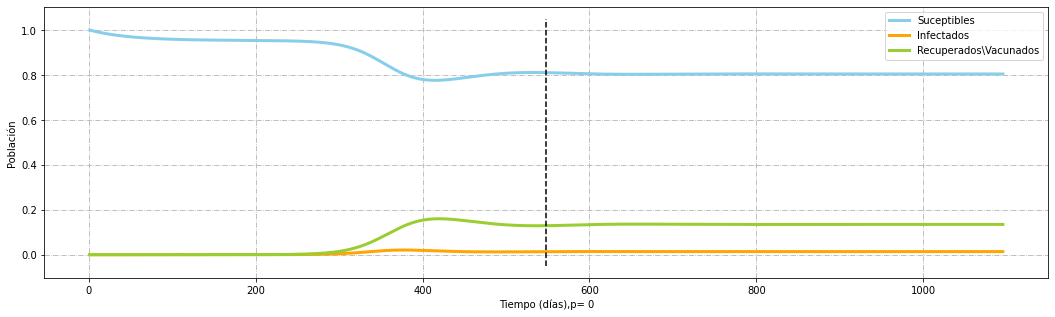

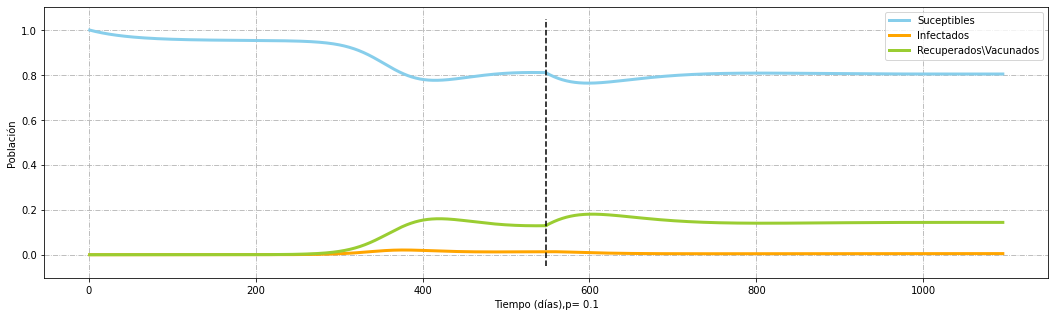

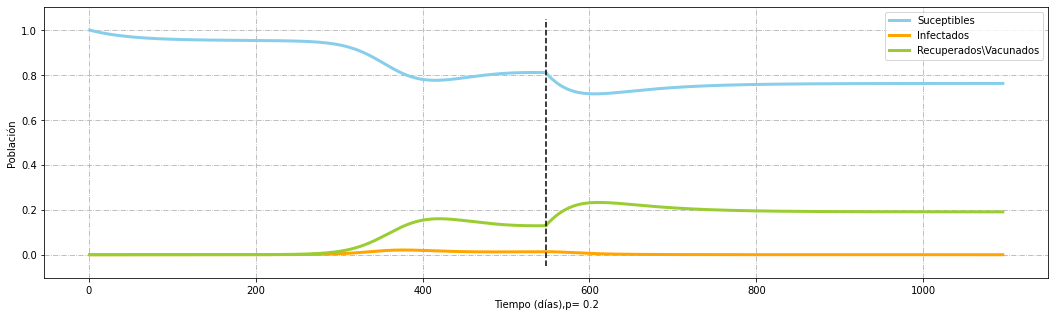

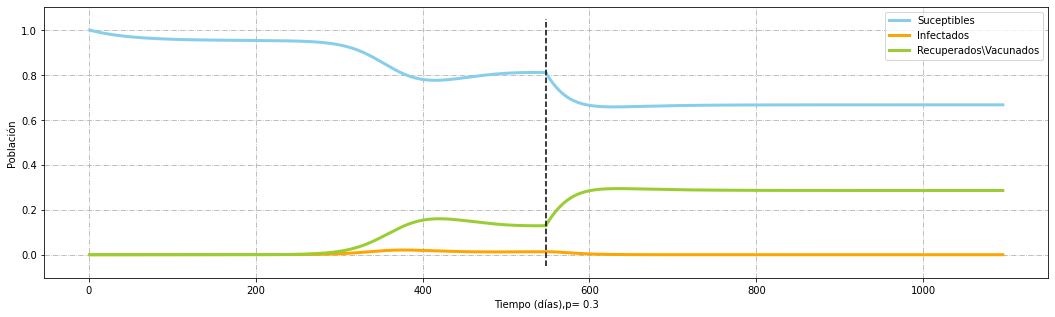

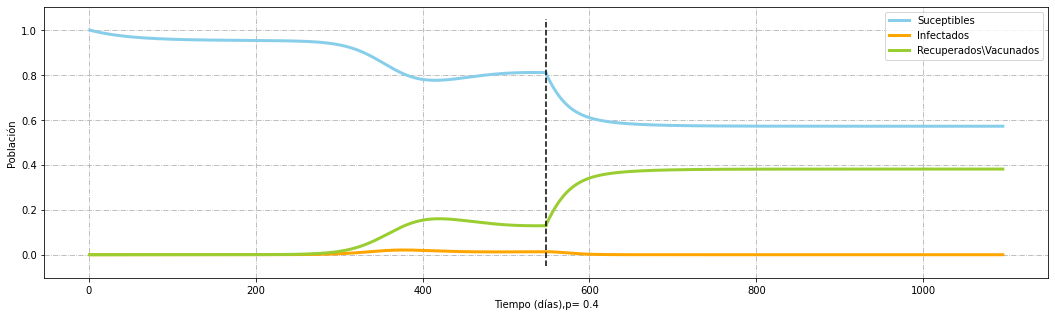

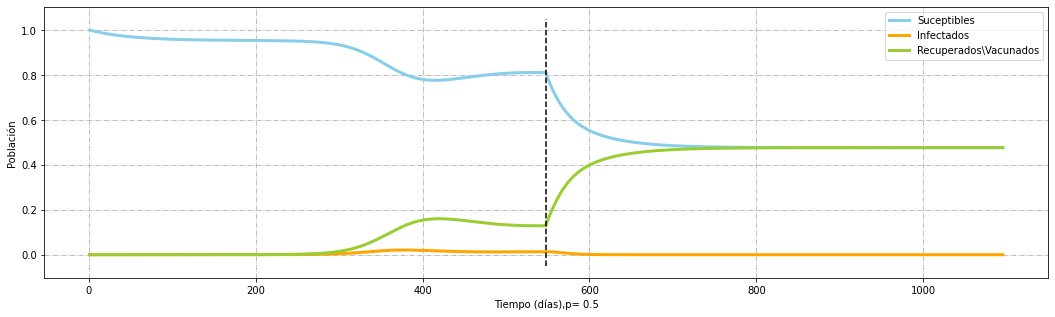

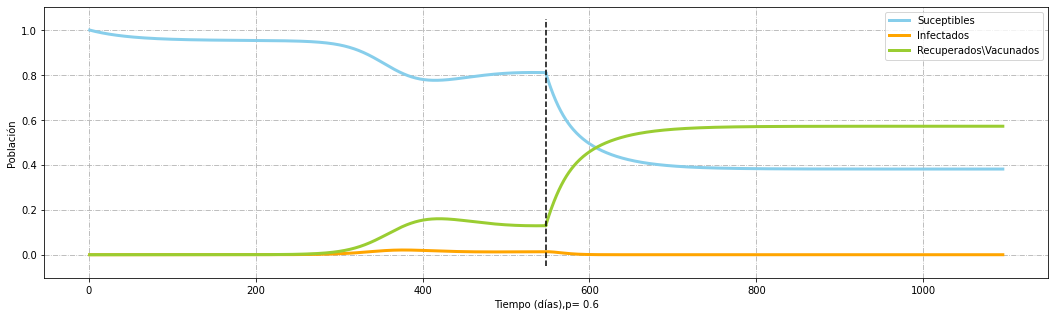

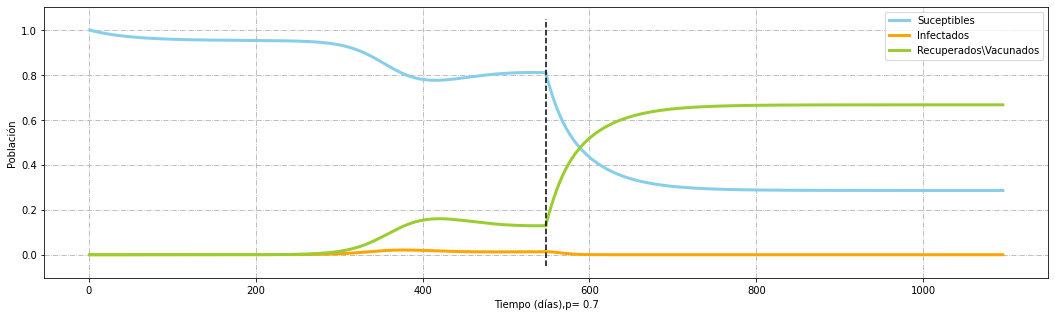

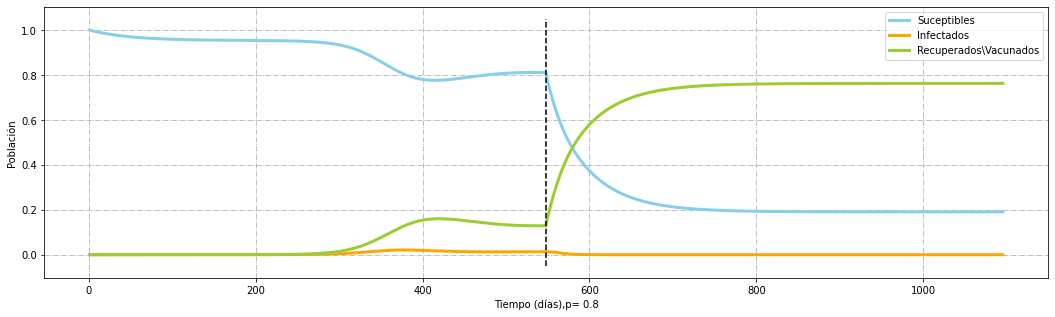

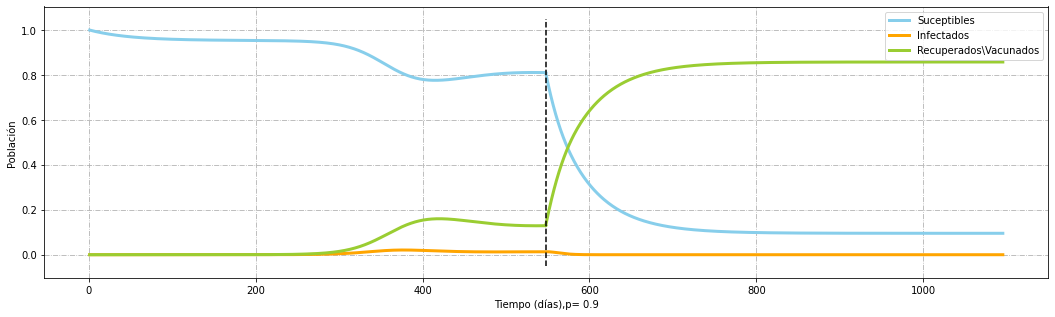

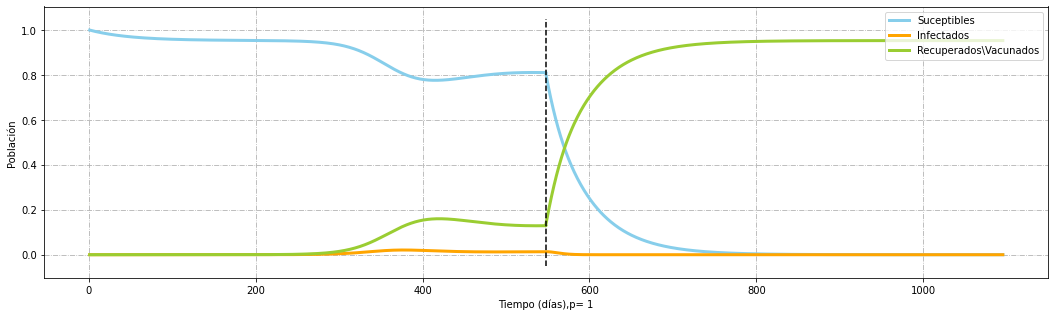

In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt 

#Parámetros y Condiciones inniciales
beta=0.28;
gamma=1/4.9;
mu=0.021;
nu=0.02;
S0=1;
I0=1e-8;
tV=1.5*365.0; 
ND=MaxTime=3*365.0;
TS=1.0
R0=1-S0-I0

INPUT = np.hstack((S0,I0,R0))

#Definimos el Sistema de Ecuaciones diferenciales
def Ecuaciones_Diff_VP(INP,t):  
	'''SIR Vacunación Pediatrica'''
	Y=np.zeros((3))
	V = INP   
	Y[0]= nu*(1-p) - beta*V[0]*V[1] - mu*V[0]
	Y[1]= beta*V[0]*V[1] - gamma*V[1] - mu*V[1]
	Y[2]= nu*p + gamma*V[1] - mu*V[2]
	return Y   

#Tiempo antes de implementar la estrategia de Vacunación
t_start = 0.0; t_end = tV; t_inc = TS 
t_range1 = np.arange(t_start, t_end+t_inc, t_inc)
#Tiempo despues de implementar la estregía de Vacunación
t_start = tV; t_end = ND; t_inc = TS
t_range2 = np.arange(tV, t_end+t_inc, t_inc)
T = np.hstack((t_range1, t_range2))

#Solución Del sistema antes de Vacunación
p=0
RES1 = spi.odeint(Ecuaciones_Diff_VP,INPUT,t_range1)
i=0

#Solución del sistema para diferentes probabilidades de exito de vacunación
for p0 in (0,0.1,0.2,.3,0.4,0.5,0.6,0.7,0.8,0.9,1):
    i=i+1
    p=p0
    RES2 = spi.odeint(Ecuaciones_Diff_VP,RES1[-1],t_range2)
    
    S = np.hstack((RES1[:,0],RES2[:,0]))
    I = np.hstack((RES1[:,1],RES2[:,1]))
    R = np.hstack((RES1[:,2],RES2[:,2]))

    plt.figure(figsize=(18,5))

    plt.plot(T[1:,], S[1:,], color='skyblue',linewidth=3,label='Suceptibles')    
    plt.plot(T[1:,], I[1:,], color='orange',linewidth=3,label='Infectados')    
    plt.plot(T[1:,], R[1:,], color='yellowgreen',linewidth=3,label='Recuperados\Vacunados')    
    plt.xlabel('Tiempo (días),p= ' + str(p))
    plt.grid(True,linestyle='-.') 
    ll=plt.ylim()
    tVV=np.repeat([tV],len(ll))
    plt.ylabel('Población')
    plt.plot(tVV, ll, '--k')
    plt.legend(loc='upper right')
    

plt.show()

### Relación con el modelo *SIR*
 Si tomamos $S=S'(1-p), \quad I=I'(1-p), \quad R=R'(1-p)+\frac{\nu}{\mu}p$, obtenemos:

\begin{align}
\frac{(1-p)dS'}{dt}&=\nu (1-p)-\beta I'(1-p)S'(1-p)-\mu S'(1-p) \\
               &=\nu (1-p)- S'(1-p) ((\beta I'(1-p) +\mu)) \\
\frac{(1-p)dI'}{dt}&=\beta S'(1-p)^2 I'-(\gamma +\mu )I'(1-p)  \\
\frac{(1-p)dR'}{dt}&=\gamma I'(1-p)+\nu p-\mu R'(1-p)-\nu p\\
                   &=\gamma I'(1-p)-\mu R'(1-p)
\end{align}

Cancelando en ambos lados de la ecuación $(1-p)$, tenemos el sistema de ecuaciones diferenciales:

\begin{align}
\frac{dS'}{dt}&= \nu -\beta I'S'(1-p) -\mu S'\\
\frac{dI'}{dt}&= \beta S'I'(1-p)- (\gamma + \mu)I' \\
\frac{dR'}{dt}&= \gamma I'-\mu R'
\end{align}

El cual concoincide con el modelo SIR con demográfia con una leve, pero importante modificación: La tasa de trasnmisión $\beta$ es reemplazada por el factor $\beta (1-p)$, lo que significa que dicha tasa disminuye en un factor de $(1-p)$, tenemos en cuenta que si en vez de tratar con la vacunacion utilizamos la consecuencias de un cambio dinámico en las tasas de natalidad ($\nu'$ por $\nu$) entonces reemplazariamos $\beta$ por $\beta\frac{\nu'}{\nu}$.

Estas observaciones nos permite concluir que:
+ **El modelo de vacunación pediátrica obecede a una tasa de reproducción $R_0'=(1-p)R_0$, donde $R_0$ era la tasa de reproducción antes de la vacunación.**
+ **Un sistema sujeto a la vacunación constante en una fracción $p$ de recien nacidos en contra de la infección cuya tasa de repodroducción se $R_0$, o con una modificación en la tasa de natalidad $\nu'$ es dinamicamente identico al sistema con $R_0'=(1-p)\frac{\nu'}{\nu}R_0$**



### Inmunidad de Rebaño

  Debido a esta conclusión, para erradicar el patogeno por vacunación pediátrica a lo largo del tiempo es necesario asegurarse que la fracción de individuos suceptibles en la población es suficientemente pequeño para evitar el esparcimiento, esto signifca que debemos intentar que el numero de infectados decienda, o lo que es equivalente $\frac{dI}{dt}\leq 0$, de donde concluimos que:

  \begin{align}
  \beta SI(1-p)-(\gamma + \mu)I & \leq 0 \\
  \beta SI(1-p) &\leq (\gamma + \mu)I  && I\geq 0 \\
  \frac{\beta}{\gamma + \mu}S(1-p) &\leq 1\\
  \frac{\beta}{\gamma + \mu}(1-p) &\leq 1 && \text{(Razón: iniciamos con el 100% de los suceptibles)} \\
  R_0(1-p) &\leq 1
  \end{align}

  Esto se traduce a que la porción critica de vacunados de recien nacidos debe ser 

  $$ p_c= 1- \frac{1}{R_0}$$

  Por lo tanto para erradicar una infección, no todos los individuos deber ser vacunados, sino una porción de ellos $p_c$. Este fenemomeno es conocido como **Inmunidad de Rebaño**

  En el siguiente gráfico observamos la relación entre $p_c$ y $R_0$


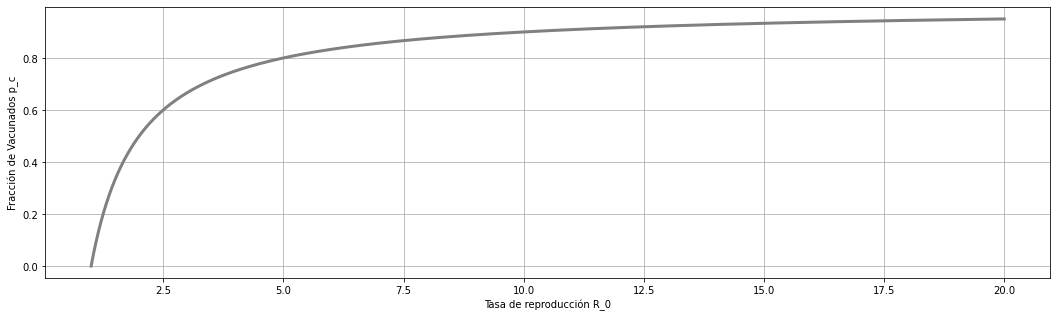

In [2]:
def Rel(r0):
   pc=1-1/r0
   return pc

r0=np.linspace(1,20,10000)
pc=Rel(r0)
plt.figure(figsize=(18,5))
plt.plot(r0,pc, color='grey',linewidth=3.0)
plt.grid(True)
plt.xlabel('Tasa de reproducción R_0')
plt.ylabel('Fracción de Vacunados p_c')
plt.show()

La vacunación del nivel critico $p_c$ no conduce instantaneamente a la erradicación de la enfermedad; el nivel crítico puede tomar un periodo grande de tiempo antes de que la inmunización de rebaño se logre. Así, desde una perspectiva de salud pública, $p_c$ actua como una cota inferior sobre lo que se debe lograr: grandes niveles de vacionacion que  conduzcan a una erradicación mas rápida (pero no instantanea) de la enfermedad.

La vacunación, entonces, es una medida de control que vale la pena incluso cuando el niveñ crítico no se a alcanzado. Para esto vemos el punto de equilibrio del sistema.

### Punto de Equilibrio:

Para encontrar el punto de equilibrio, buscamos la solución al sistema de ecuaciaiones $\frac{dS}{dt}=\frac{dI}{dt}=\frac{dR}{dt}=0$; buscamos por lo tanto un punto $(S^*,I^*,R^*)$ que sea solución del sistema:

\begin{align}
0&=\nu (1-p)-\beta I^* S^*-\mu S^*\\
0&=\beta I^* S^*-(\gamma+\mu)I^* \\
0&=\gamma I^*+\nu p-\mu R^* 
\end{align}

Tomamos la segunda ecuación y factorizando $I^*$ vemos que 

\begin{equation}
I^*(\beta S^* -(\gamma+\mu))=0 \Leftrightarrow 
\begin{array}
  &\quad I^*=0& \\ \quad\quad \text{ó} \\ S^*=\frac{\gamma+\mu}{\beta}=\frac{1}{R_0} 
\end{array}
\end{equation}

Para el primer caso, $I^*=0$, tenemos que la enfermedad eventualmente es erradicada, y obtenemos que:

\begin{align}
 S^*=\frac{\nu (1-p)}{\mu} && && R^*=1-S^*-I^*=1-\frac{\nu(1-p)}{\mu}
\end{align}

Luego el punto de equilibrio es $(S^*, I^*,R^*)=(\frac{\nu (1-p)}{\mu},0,1-\frac{\nu(1-p)}{\mu})$

Por otrolado, si no erradicamos la enfermedad, entonces $S^*=0$, es decir $S^*=\frac{\gamma+\mu}{\beta}=\frac{1}{R_0}$ y deducimos:

\begin{align}
I^*&=\frac{\nu(1-p)}{\gamma+\nu}-\frac{\mu}{\beta} && \text{y} && R^*=1-S*-I* \\
&=\frac{\nu R_0'-\mu}{\beta} && && \quad=1-\frac{\nu(1-p)}{\gamma+\mu}-\frac{\mu}{\beta}
\end{align}

Luego $(S^*,I^*,R^*)=(\frac{1}{R_0},\frac{\nu R_0'-\mu}{\beta},1-\frac{\nu(1-p)}{\gamma+\mu}-\frac{\mu}{\beta})$. Notemos que cuando no se alcanza la inmunización, el equilibrio de la fracción de infectados decrese linealmente con el incremento de las vacunados, hasta que posteriormente la erradicación se logre. Comparado con el punto de equilibrio cuando no se práctica la vacunación pediatrica ($I^*=\frac{\nu}{\gamma+\mu}-\frac{\mu}{\beta}$), vemos que $\frac{\gamma p}{\beta}$ de los individuos no vacunados se salvan de la infección por los efectos de la inmidad de rebaño.

In [3]:

def EquilibrioErrdicacion(beta,gamma,mu,nu,p):
  y=np.zeros(3)   
  y[0]=(nu*(1-p))/ mu
  y[1]=0           
  y[2]=1-y[0]
  return y

def EquilibrioSinErradicacion(beta,gamma,mu,nu,p):
  y=np.zeros(3)
  y[0]=(gamma+mu)/beta
  y[1]=(nu*(1-p))/(gamma+mu)-(mu/beta)
  y[2]=1-y[0]-y[1]
  return  y


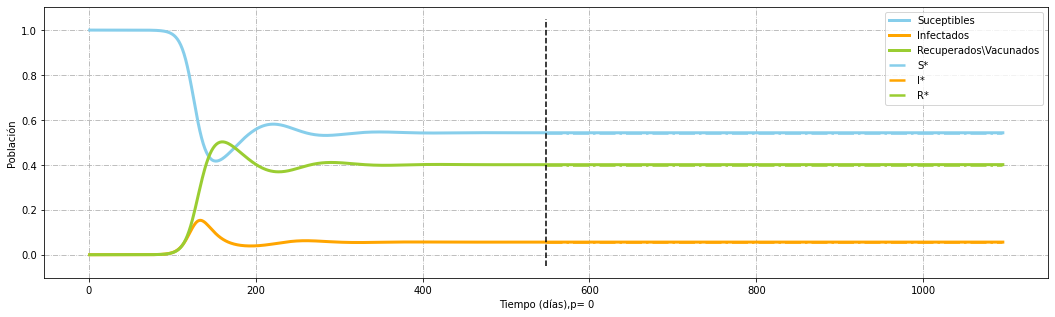

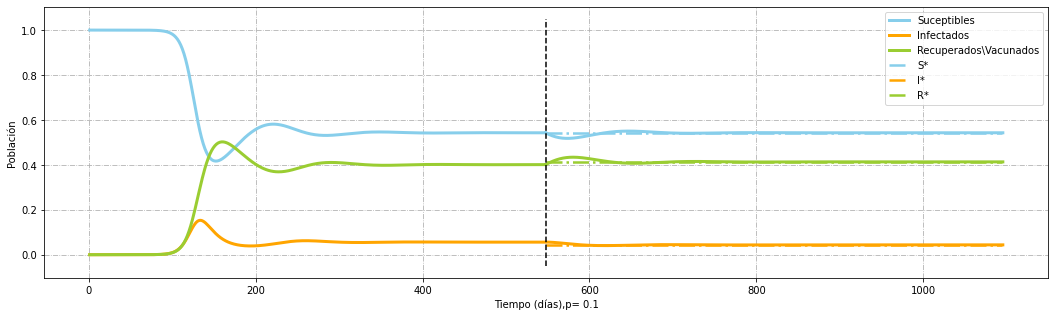

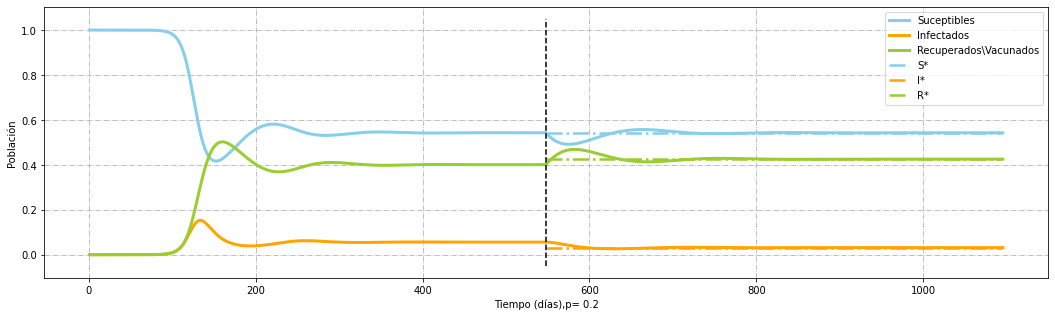

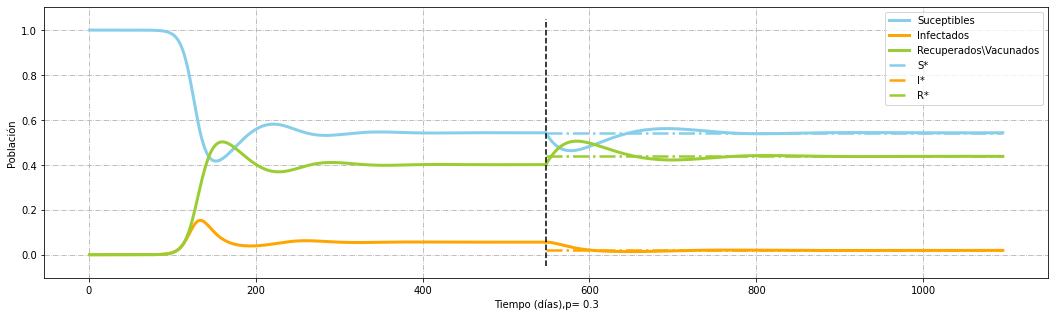

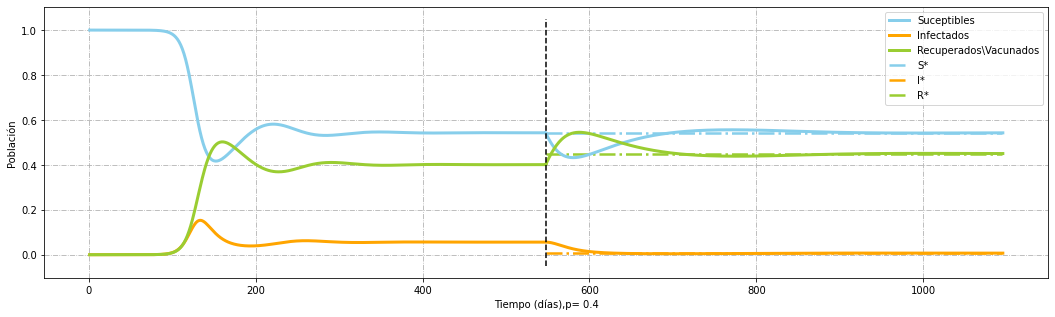

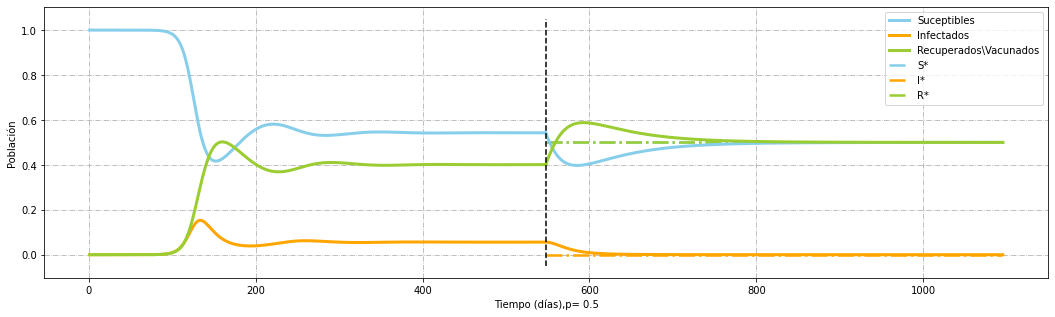

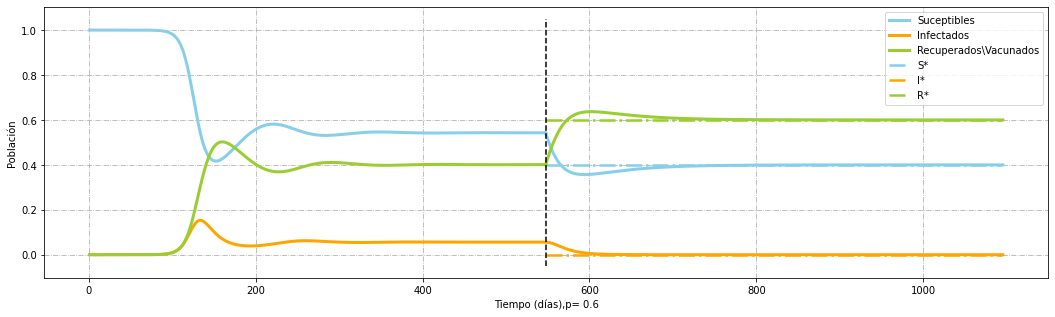

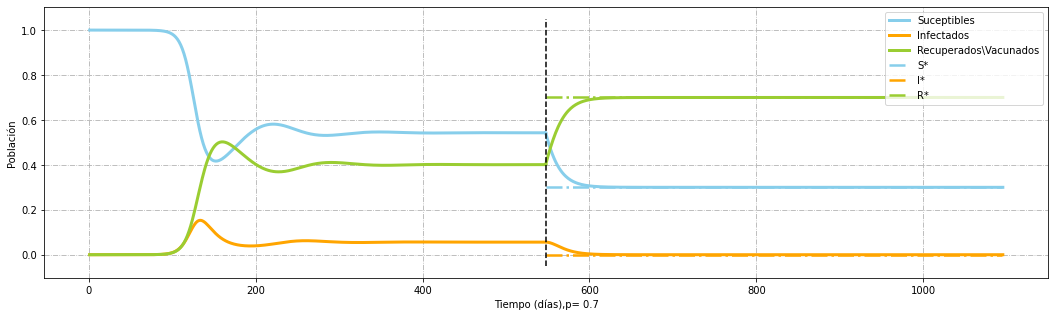

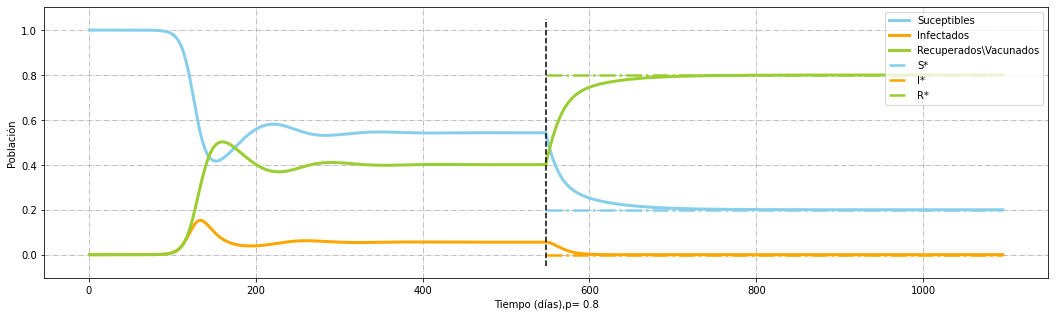

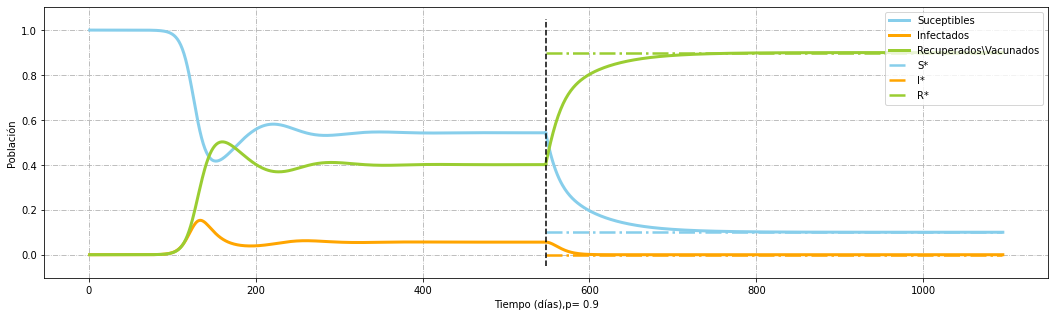

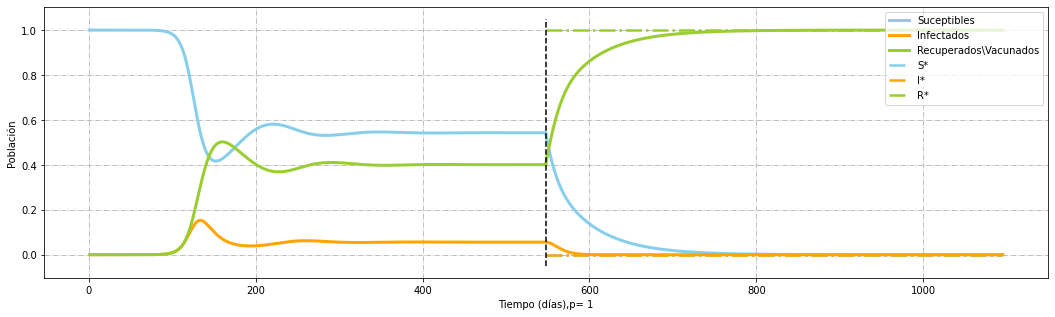

In [4]:
#Parámetros del Sistema
beta=0.3;
gamma=1/7.0;
mu=0.02;
nu=0.02;
S0=1;
I0=1e-8;
tV=1.5*365.0; 
ND=MaxTime=3*365.0;
TS=1.0
R0=1-S0-I0


INPUT = np.hstack((S0,I0,R0))

def Ecuaciones_Diff_VP(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP   
	Y[0]= nu*(1-p) - beta*V[0]*V[1] - mu*V[0]
	Y[1]= beta*V[0]*V[1] - gamma*V[1] - mu*V[1]
	Y[2]= nu*p + gamma*V[1] - mu*V[2]
	return Y   # For odeint

t_start = 0.0; t_end = tV; t_inc = TS
t_range1 = np.arange(t_start, t_end+t_inc, t_inc)
t_start = tV; t_end = ND; t_inc = TS
t_range2 = np.arange(tV, t_end+t_inc, t_inc)
T = np.hstack((t_range1, t_range2))
p=0
RES1 = spi.odeint(Ecuaciones_Diff_VP,INPUT,t_range1)


for p0 in (0,0.1,0.2,.3,0.4,0.5,0.6,0.7,0.8,0.9,1):
    
    p=p0
    RES2 = spi.odeint(Ecuaciones_Diff_VP,RES1[-1],t_range2)
    
    E1=EquilibrioErrdicacion(beta,gamma,mu,nu,p)
    E2=EquilibrioSinErradicacion(beta,gamma,mu,nu,p)
     
    #Determinación si se llega o no a la erradicación
    if E1[1]<E2[1]:
      E=E2
    else:
      E=E1
    
    S = np.hstack((RES1[:,0],RES2[:,0]))
    I = np.hstack((RES1[:,1],RES2[:,1]))
    R = np.hstack((RES1[:,2],RES2[:,2]))

    plt.figure(figsize=(18,5))

    plt.plot(T[1:,], S[1:,], color='skyblue',linewidth=3,label='Suceptibles')    
    plt.plot(T[1:,], I[1:,], color='orange',linewidth=3,label='Infectados')    
    plt.plot(T[1:,], R[1:,], color='yellowgreen',linewidth=3,label='Recuperados\Vacunados')    
    plt.xlabel('Tiempo (días),p= ' + str(p))
    plt.grid(True,linestyle='-.') 
    ll=plt.ylim()
    tVV=np.repeat([tV],len(ll))
    plt.ylabel('Población')
    plt.plot(tVV, ll, '--k')
    #Gráfica del punto de Equilibrio
    plt.hlines(E[0],tV,MaxTime,color='skyblue',linestyle='-.',label='S*',linewidth=2.5)
    plt.hlines(E[1],tV,MaxTime,color='orange',linestyle='-.',label='I*',linewidth=2.5)
    plt.hlines(E[2],tV,MaxTime,color='yellowgreen',linestyle='-.',label='R*',linewidth=2.5)
    plt.legend(loc='upper right')
    
plt.show()

## Vacunación Masiva

El mecanismo de vacunación masiva consiste en vacunar a una tasa constante $u$ ($u\geq 0$) con una taza de inmunización $p_V$; en este caso entonces, $u$ representa la catidad de individuos vacunados por unidad de tiempo $t$. Es claro que la vacuna solo es aplicada para aquellos individuos que son suceptibles.

El proceso de vacunacion en masa puede iniciarse siempre que aumente un riesgo de pandemia. En esta situación existe una "carrera" entre el crecimiento exponencial de la epidemia, y las limitaciones logisticas de la vacunación masiva. Para este modelo de vacunación, tomaremos como base el modelo *SIR* sin demografía, sin embargo, se hará una distinción entre quienes hayan adquirido la inmunidad por medio de la vacunación ($V$) y quienes hayan adquirido la inmunidad por recuperación ($R$), por lo tanto se consideraran los estados 



*   $S$: Suceptibles
*   $I$: Infectados
*   $R$: Recuperados
*   $V$: Vacunados

De nuevo, al no tener en cuenta la demografía se cumple que: $$S'+I'+R'+V'=0$$

El modelo por compartimentos puede ser visto como: **Agregar Imagen del Modelo De compartimentos** De donde el modelo estara dado por el sistema de ecuaciones diferenciales

\begin{align}
\frac{dS}{dt}&=-\beta SI-p_V*u \\
\frac{dI}{dt}&=\beta SI-\gamma I \\
\frac{dR}{dt}&=\gamma I \\
\frac{dV}{dt}&=p_V*u 
\end{align}

Es claro que la vacunación se detiene cuando la cantidad de Suceptibles llega a cero.


### Solución Numérica del Sistema

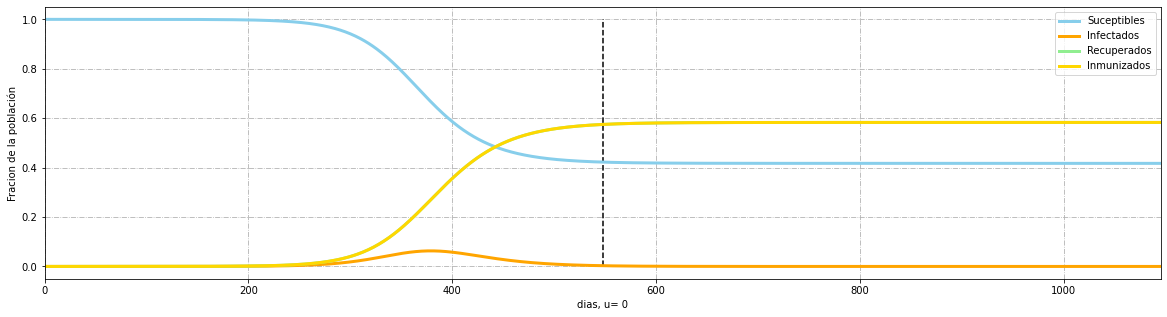

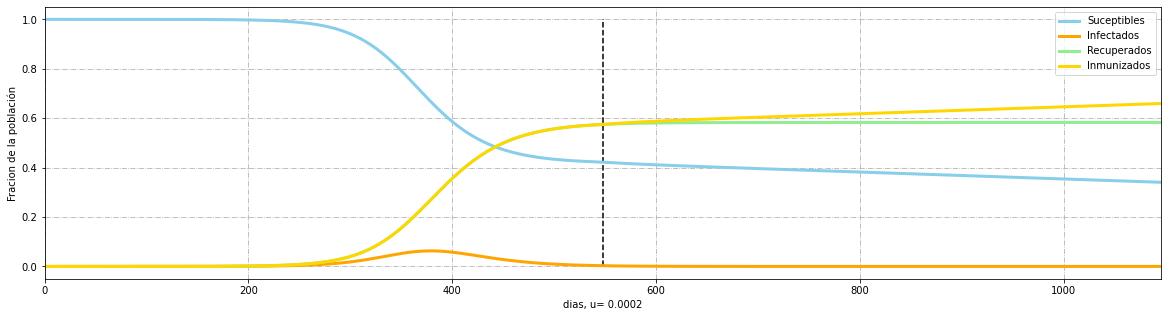

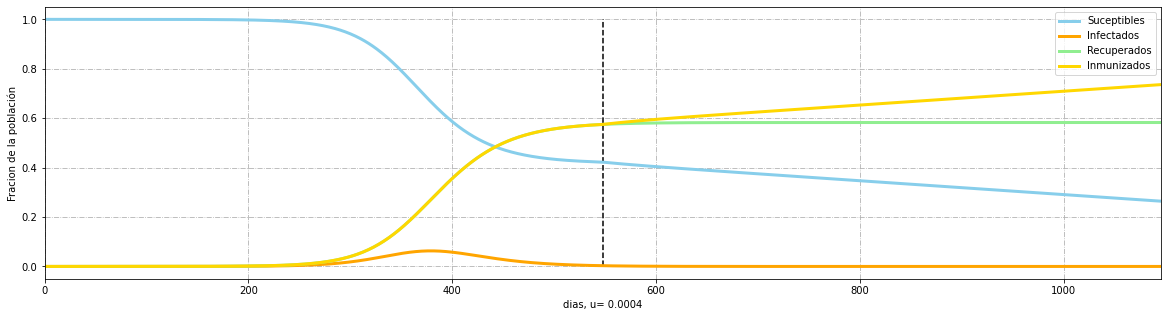

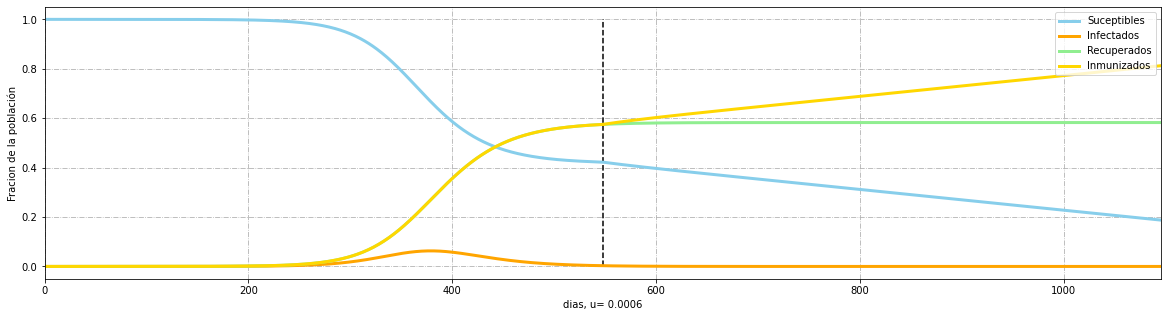

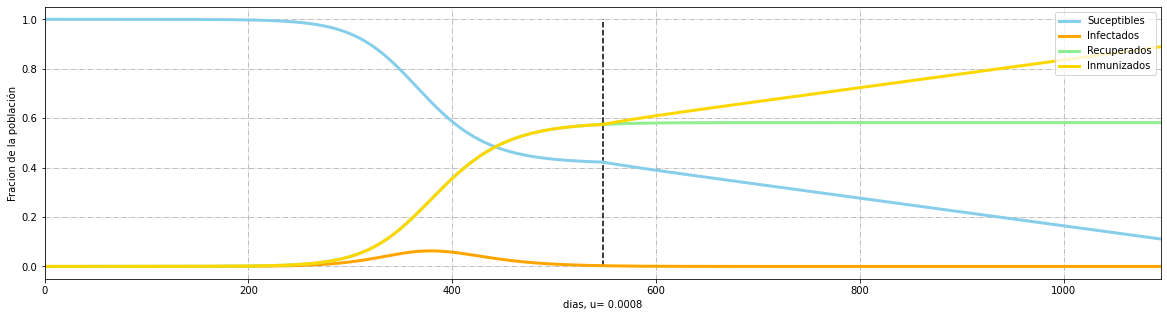

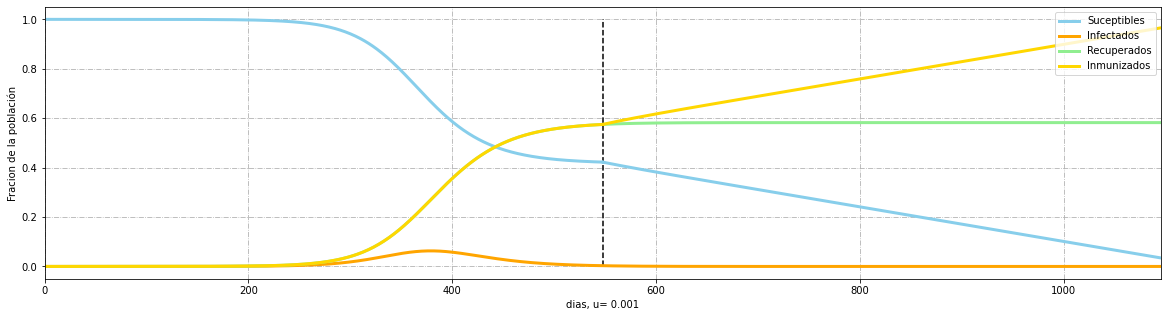

In [5]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

#Definicion de condiciones iniciales
s_initial=1
i_initial=1e-6
v_initial=0
r_initial=1-s_initial-i_initial-v_initial
x_initial=s_initial, i_initial, r_initial, v_initial

def diffSIRV(x,t,beta,gamma,u,p): 
  S, I, R, V =x
  dsdt= -beta*S*I -p*u
  didt= beta*S*I-gamma*I
  drdt= gamma*I
  dvdt= p*u
  return  [dsdt, didt, drdt, dvdt]

#Definición de Parámetros
beta=0.1
gamma=1/15
TF=3*365
tV=1.5*365 
p=0.7

#Tiempo antes de Vacunación
t_inicio = 0.0; t_final = tV; t_inc = 1
t_range1 = np.arange(t_inicio, t_final+t_inc, t_inc)
#Tiempo despues de Vacunacion
t_inicio = tV; t_end = TF; t_inc = 1
t_range2 = np.arange(tV, t_end+t_inc, t_inc)
T = np.hstack((t_range1, t_range2))
#Solución del Sistema
u=0
RES1 = spi.odeint(diffSIRV,x_initial,t_range1,args=(beta,gamma,u,p))


#Solución del sistema para diferentes u
for u in (0,0.0002,0.0004,0.0006,0.0008,0.001):
  
  RES2 = spi.odeint(diffSIRV, RES1[-1], t_range2, args=(beta, gamma,u,p))
  
  S = np.hstack((RES1[:,0],RES2[:,0]))
  I = np.hstack((RES1[:,1],RES2[:,1]))
  R = np.hstack((RES1[:,2],RES2[:,2]))
  V = np.hstack((RES1[:,3],RES2[:,3]))
  
      
  i=0

  #Solución del sistema hasta que se llegue a la erradicación
  while S[i]>0:
   i=i+1
   if i==len(S):
     break

  j=0
  while V[j]+R[j]<=1:
   j=j+1
   if j==len(V):
     break


  V1=V[0:j]
  S1=S[0:i]
  R1=R[0:j]

    
  plt.figure(figsize=(20,5))
  plt.plot(T[0:len(S1)],S1, color='skyblue',linewidth=3,label='Suceptibles')
  plt.plot(T,I,color='orange',linewidth=3,label='Infectados')
  plt.plot(T,R,color='lightgreen',linewidth=3,label='Recuperados')
  plt.plot(T[0:len(V1)],V1+R1,color='gold',linewidth=3,label='Inmunizados')
  plt.xlim(0,TF)
  plt.grid(True,linestyle='-.')
  plt.vlines(tV,0,1, color='k', linestyles='--')
  plt.legend(loc='upper right')
  plt.ylabel('Fracion de la población')
  plt.xlabel('dias, u= '+str(u))

  if len(S1)<len(S): 
    plt.hlines(0, T[len(S1)-1],TF,color='skyblue',linewidth=3)

  if len(V1)<len(V):
    plt.hlines(1,T[len(V1)-1],TF,color='gold',linewidth=3)

plt.show()

Note que la tasa de infectados sigue una curva gaussiana y la prevalencia inicial de la enfermedad
al comienzo de la inmunización (I(0)) determina la escala de la epidemia subsiguiente. Esto recae
en un principio de la epidemiología: “La mejor manera de controlar una epidemia
es golpearlo fuerte y golpearlo temprano”; una respuesta fuerte conduce a la reducción más rápida en la población susceptible, lo que reduce la epidemia, y genera una respuesta rápida que previene el aumento exponencial de casos por ir más allá del control logístico.



### Agotamiento de la Epidemia 

Al igual que en el modelo *SIR*, analizaremos brevemente el estado a largo plazo( o asintotico)  de la epidemia. Para ellos tendremos en cuenta dos extremos:

 - **El porcentaje de vacunación de la población es pequeño:** Si consideramos $u$ como una pámetro pequeño, cercano a cero, entonces la vacuna tendra un escaso impacto, y por lo cual el el sistema coincidirá exactamente con el modelo original, lo que nos lleva a concluir que el estado a largo plazo ($S(0)=1$) de la epidemia es: 

  \begin{align}
     S_\infty&=e^{-R_\infty R_0} \\
     R_\infty&=1-e^{-R_\infty R_0}
  \end{align}

- **El porcentaje de vacunación de la población es grande:**  Si consideramos  $u$  grande,entonces en la ecuación $\frac{dS}{dt}=-\beta SI-u$ es posible ignorar el término $-\beta SI$, es decir, se asume que el nivel de suceptibles decrese por la vacunación a mayor escala que el impacto de la infección, luego obtenemos $\frac{dS}{dt}\approx -up$. De donde, al solucionar la ecuación diferencial obtenemos: 
$$S(t)=max\{S(0)-upt,0\}.$$ Así, bajo estas suposiciones, el numero de infectados puede escribirse como:

\begin{align}
\frac{dI}{dt}=
\begin{cases}
 I(\beta S(t)-\gamma), & \text{si} \quad t\leq\frac{S(0)}{u\cdot p} \\
 -\gamma I , & \text{e.o.c}
\end{cases}
\end{align}
De donde obtenemos que:

\begin{align}
I(t)=
\begin{cases}
 I(0)e^{t((\beta S(0)-\gamma)-0.5\beta up t)}, & \text{si} \quad  t\leq\frac{S(0)}{u\cdot p} \\
 I(0)e^{-\gamma t} , & \text{e.o.c}
\end{cases}
\end{align}

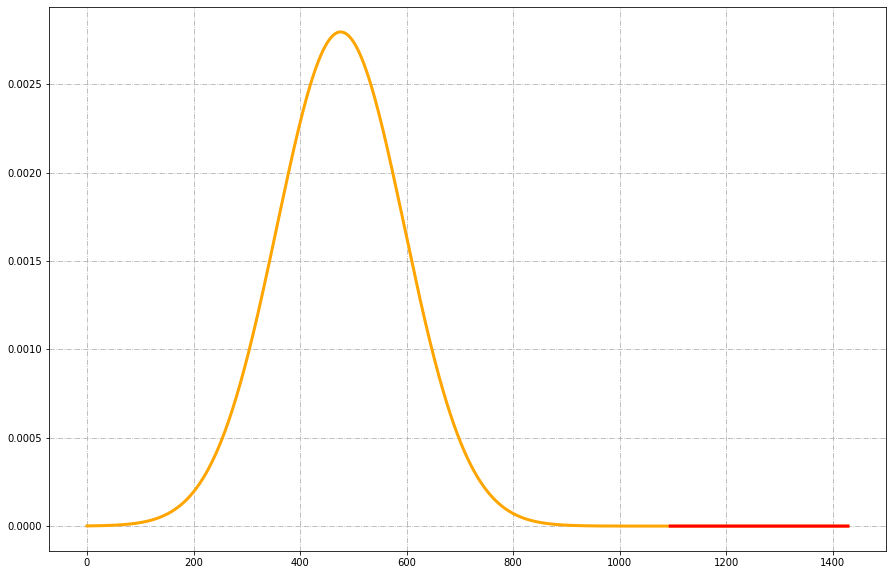

In [6]:

#Función de Infectados en el tiempo cuando se logra la Erradicación
def InfectadosU(t):
  I=i_initial*np.exp(t*(beta*s_initial-gamma-0.5*beta*p*u*t))
  return I
#Funcion de Infectados en el tiempo cuando  no se logra la Erradicación
def InfectadosSin(t):
  I=i_initial*np.exp(-gamma*t)
  return I

#Condiciones Iniciales y tiempos

Cambio=s_initial/(u*p) 
time1=np.linspace(0,Cambio,100000)
time2=np.linspace(Cambio,3*365.0,100000)
y1=InfectadosU(time1)
y2=InfectadosSin(time2)

#Gráfica del modelo de I(t)
plt.figure(figsize=(15,10))
plt.grid(True,linestyle='-.')
plt.plot(time1,y1,color='orange',linewidth=3)
plt.plot(time2,y2,color='red',linewidth=3)

plt.show()

## **Vacunación por Pulsos**

Los enfoques descritos anteriormente se basan en la inmunización de recién nacidos o individuos jóvenes y, aunque los detalles son específicos de la población y la enfermedad, la teoría general predice una erradicación exitosa si los niveles de inmunidad inducida por la vacuna superan el 70-95%. Sin embargo, alcanzar niveles tan altos de inmunidad son un gran desafío, especialmente frente a dificultades financieras, políticas y logísticas.
Por eso se ha probado un enfoque alternativo, la vacunación por pulsos, donde los niños en de cierto intervalo de edad son inmunizados periódicamente. El principal objetivo de la vacunación por pulsos es asegurarse que la población suceptible se mantiene por debajo del nivel $S_c=\frac{1}{R_0}$ (población cíitica para erradicar la enfermedad) , a través de inmunización periodica.

El modelo consistira entonces en una modificación el modelo *SIR* con demografia en donde se añadiran algunos terminos que daran cuenta la estrategia de vacuación empleada. El esquema propone vacunar a una fraccion $p_V$ de la población Suceptible en un solo pulso, aplicado cada $T$ dias.f
**Agregar Figuras en el Overleaf**

Luego el sistema de ecuaciones diferenciasles tendra la forma:

\begin{align*}
\frac{dS}{dt}&=\mu-\beta SI-\mu S-p_V\sum_{n=0}^\infty S(nT^-)\delta(t-nT) \\
\frac{dI}{dt}&=\beta SI-\gamma I-\mu I \\
\frac{dR}{dt}&= \gamma I +p_V\sum_{n=0}^\infty S(nT^-)\delta(t-nT)-\mu R
\end{align*}

Donde $T$ es el intervalo entre cada pulso de vacunación, $S(nT^-)$ representa el nivel de suceptibles  en el instante inmediatamente anterior de la $n$-esima vacunación y  $\delta(t)$ es la función delta de Dirac; con estas aclaraciones, el ultimo termino de que aparece en la primera ecuación del sistema da cuenta que la cantidad de suceptibles se ve reducida en una cantidad $p_V$ en cada pulso de vacunación.

### **Solución Númerica del Sistema**

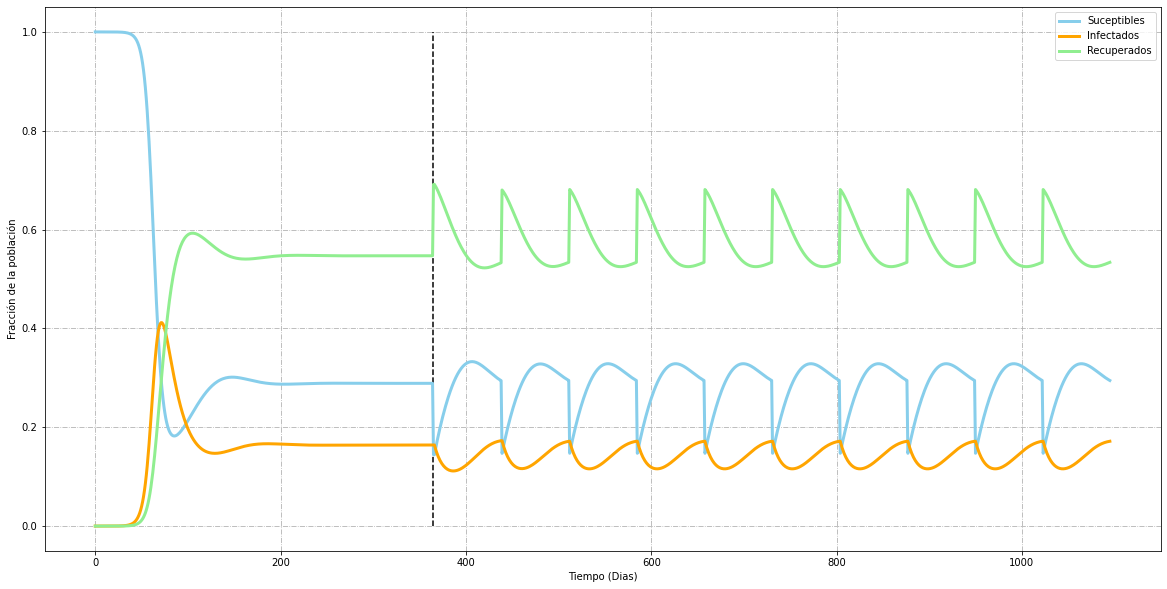

In [7]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

#Definición de Parámetros y Condiciones Iniciales
beta=0.3;
gamma=1/15.0;
mu=0.02;
S0=1;
I0=1e-6;
p=0.5;
T=73;
tV=R=1*365.0;
ND=MaxTime=3*365;
TS=1.0
R0=1-S0-I0

INPUT = np.hstack((S0,I0,R0)) #Vector de Condiciones iniciales

def diff_eqs(INP,t):  
	'''Sistema de Ecuaciones diferenciles SIR con demográfia'''
	Y=np.zeros((3))
	V = INP   
	Y[0]= mu - beta*V[0]*V[1] - mu*V[0]
	Y[1]= beta*V[0]*V[1] - gamma*V[1] - mu*V[1]
	Y[2]= gamma*V[1] - mu*V[2]
	return Y  

t_start = 0.0; t_end = tV; t_inc = TS
t_range1 = np.arange(t_start, t_end+t_inc, t_inc)
t_start = tV; t_end = ND+TS; t_inc = TS
t_range2 = np.arange(tV, t_end, t_inc)
TT = np.hstack((t_range1, t_range2))
RES1 = spi.odeint(diff_eqs,INPUT,t_range1)
i=0
INPUT=RES1[-1]
RES2=np.zeros((3))

#Agrega la vacunación por pulsos en cada intervalo T; simula la función Delta de Dirac
while t_range2[i]<ND:  
	INPUT[2]=INPUT[2]+INPUT[0]*p; 
	INPUT[0]=INPUT[0]*(1-p); #vacunación de p personas suceptibles en el intervalo T
	t_range3 = np.arange(t_range2[i], t_range2[i+T], t_inc)  
	tc2 = spi.odeint(diff_eqs,INPUT,t_range3) #Solucion del sistema
	INPUT=tc2[-1]
	RES2= np.vstack((RES2, tc2))
	i+=T  #Siguiente perodo de vacunación

#Solución total del sistema antes y despues del inicio de cada pulso de vacunación
RES2=RES2[1:,]
S = np.hstack((RES1[:,0],RES2[:,0]))
I = np.hstack((RES1[:,1],RES2[:,1]))
R = np.hstack((RES1[:,2],RES2[:,2]))
TT = np.arange(len(S))


#Gráficas 
plt.figure(figsize=((20,10)))
plt.plot(TT, S, color='skyblue',label='Suceptibles',linewidth=3)
plt.plot(TT, I, color='orange',label='Infectados',linewidth=3)
plt.plot(TT, R, color='lightgreen',label='Recuperados',linewidth=3)
plt.vlines(tV,0,1,color='k',linestyles='--')
plt.legend(loc='upper right')
plt.ylabel('Fracción de la población')
plt.xlabel('Tiempo (Dias)')
plt.grid(True,linestyle='-.')

plt.show()

### **Brecha óptima entre Pulsos de Vacunación**

Siguiendo el análisis de estabilidad (hecho en) llegamos entonces a que la brecha óptima entre pulsos para asegurar la erradicación está dada por la ecuación:

$$\frac{(\mu T -p_v)(e^{\mu T -1})+\mu p_v T}{\mu T(p_v-1+e^{\mu T})}<\frac{1}{R_0}$$

Es posible obtener una expresión para el máximo periodo permitible para el pulso, $T_{max}$, en el cual el criterio de estabilidad se satisface. Ocurre cuando se tiene la igualdad en la formulación anterior. Podemos simplificar esta formulación para $T_{max}$ usando series de Taylor y asumiendo el periodo de los pulsos más corto que el tiempo de vida media, $T \ll 1/m$, y que el tiempo de vida medio de un individuo es más largo que la duracióan de la enfermedad.
Al ignorar los términos superiores de la serie de Taylor obtenemos:

$$T_{max}\simeq \frac{\gamma \ p_v}{\beta \mu}\frac{1}{\left(1-\frac{p_v}{2}-\frac{\gamma}{\beta}\right)}$$

Se estudiará ahora la formulación en la que los pulsos son aplicados frecuentemente para asegurar $\frac{dL(t)}{dt}<0$ para todo $t$, $S(t)<S_c=\frac{(\mu+\gamma)}{\beta}$ (Se aplica la vacunación por pulsos cada vez que $S(t)$ se aproxima al límite $S_c$). Asumimos que la vacunación por pulsos es aplicada periodicamente (con $T<T_{max}$) tal que la población suceptible oscila en un ciclo límite estable. Lo que queda ahora es determinar el máximo de intervalos entre pulsos para el cual $S(t)$ est\'a permanentemente abajo del límite.

El mínimo número de individuos susceptibles ocurre justo después de la vacunación por pulsos y está dado por $S^*$, mientras que la máxima cantidad de susceptibles ocurre justo antes de la vacunación y es igual a $\frac{S^*}{(1-p)}$. Por tanto, para asegurar que $S(t)<S_c$, se tiene: 
$$\frac{S^*}{(1-p)}<S_c$$

Ahora, estudiamos esta inecuación como ecuación y llegamos a la expresión:
$$T_{max}=\frac{1}{\mu} \ ln\left(1+\frac{p_v \ S_c}{1-S_c}\right)$$

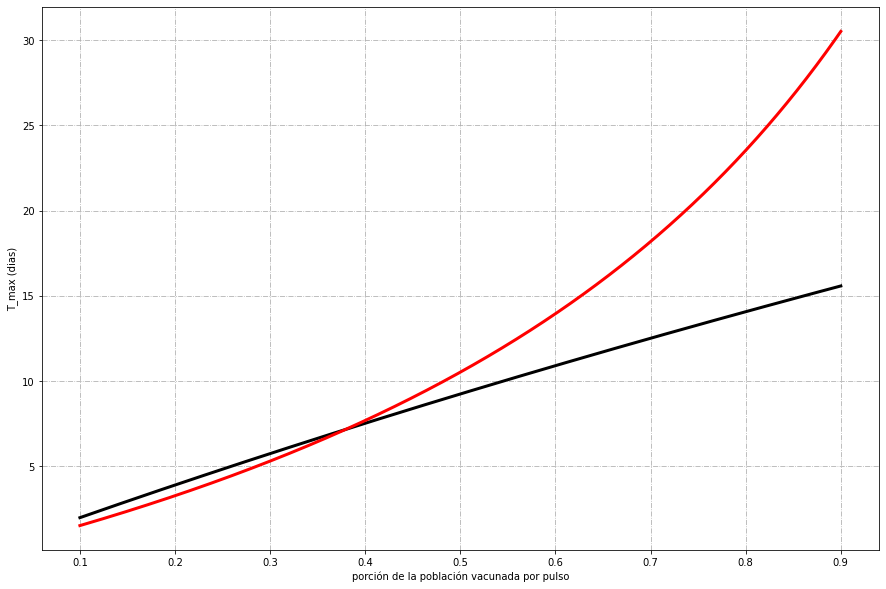

In [8]:
#Función T_max dependiendo de la cantidad de personas vacunadas por cada pulso P_v

def T_max(mu,S_c,p):
  T_max=(1/mu)*np.log(1+((p*S_c)/(1-S_c)))
  return T_max

def AproxT_max(mu,beta,gamma,p):
   c1=(gamma*p)/(beta*mu)
   c2=1-p/2-gamma/beta
   T_max=c1/c2
   return T_max

beta=0.3;
gamma=1/15.0;
mu=0.02;
R_0=beta/(mu+gamma)
S_c=1/R_0
p=np.linspace(0.1,0.9,1000)
y1=T_max(mu,S_c,p)
y2=AproxT_max(mu,beta,gamma,p)



plt.figure(figsize=(15,10))
plt.grid(True,linestyle='-.')
plt.plot(p, y1, linewidth=3,color='k')
plt.plot(p,y2,linewidth=3,color='red')
plt.xlabel('porción de la población vacunada por pulso')
plt.ylabel('T_max (dias)')

plt.show()


En el anterior gráfico se realiza una grafica con las aproximaciones anteriores al tiempo maximo entre pulsos en función de la poblacion $p_v$ que se vacuna en cada pulso. La gráfica roja corresponde a la primera aproximación, mientras que la gráfica negra corresponde a la aproximación "mejorada".

## **Aplicación básica de algunos modelos de vacunacion en Colombia**

El *COVID-19* es una enfermedad infecciosa causada por el nuevo coronavirus,
SARS-CoV-2. El coronavirus-2019 es una enfermedad respiratoria que puede afectar
otros órganos; se han informado distintos síntomas, que van desde síntomas leves a enfermedad grave. Los síntomas pueden aparecer de 2 a 14 días después de la exposición al virus, estos incluyen fiebre o escalofríos; tos; dificultad para respirar; fatiga; dolores musculares o corporales;
dolor de cabeza; pérdida del gusto u olfato; dolor de garganta; congestión o secreción nasal; náuseas o vómitos; o diarrea.



### **Vacuna Janssen**

La vacuna Janssen para prevenir el COVID-19 (en personas mayores de 18 años) es una suspensión para inyección intramuscular administrada como
dosis única (0,5 ml). Janssen fue desarrollada a través del método científico denominado vector viral. Los viales multidosis no perforados de la vacuna Janssen para el COVID-19 se deben almacenar a una temperatura de $2° C$ a $8 ° C$ y proteger de la luz. No se debe almacenar congelado.

Despues de la vacuna de Janssen se evidencio la aparicion de COVID-19 de moderada a grave / crítica con inicio de síntomas al menos 14 días y al menos 28 días después de la vacunación:




>Moderada: Se experimentan alguno de los siguientes signos o síntomas nuevos o que empeoran: frecuencia respiratoria ≥20 respiraciones / minuto, saturación anormal de oxigeno, evidencia clínica o radiológica de neumonía, evidencia radiológica de trombosis venosa profunda (TVP), falta de aliento o dificultad para respirar ,fiebre, frecuencia cardíaca
≥90 latidos / minuto, escalofríos o escalofríos, dolor de garganta, tos, malestar, dolor de cabeza, músculos
dolor (mialgia), síntomas gastrointestinales, trastornos del gusto o del olfato nuevos o cambiantes, enrojecimiento
o pies o dedos de los pies con apariencia de magulladuras.



> Critico: Se experimenta signos clínicos en reposo indicativos de enfermedad sistémica grave , insuficiencia respiratoria,
evidencia de shock , insuficiencia renal, hepática o neurológica aguda significativa disfunción, ingreso en unidad de cuidados intensivos (UCI), muerte.




Nota: se confirmo COVID-19 en los individuos de forma molecular por un laboratorio central basado en un resultado positivo. Resultado del ARN viral del SARS-CoV-2 utilizando una prueba basada en la reacción en cadena de la polimerasa (PCR).


**Eficacia contra COVID-19:**

*La vacuna de Janssen contra el COVID-19  tuvo una efectividad del 66,3 % en ensayos clínicos (eficacia) en la prevención de casos de COVID-19 confirmados en laboratorio en personas que recibieron la vacuna y que no registraban evidencia de infecciones previas. 

*Las personas alcanzaron la máxima protección posible 2 semanas después de vacunarse. En los ensayos clínicos, la vacuna tuvo un alto nivel de eficacia para prevenir la hospitalización y muerte de personas que contrajeron la enfermedad. Nadie que haya contraído el COVID-19 al menos 4 semanas después de recibir la vacuna contra el COVID-19 de Janssen debió ser hospitalizado

*La mediana de duración del seguimiento de la eficacia para los individuos del estudio fue de 8 semanas después de la vacunación

*La eficacia de la vacuna para los criterios de valoración de sintomas moderada a grave / crítica frente al COVID-19 en individuos que eran seronegativos o que tenían un estado serológico desconocido al inicio del estudio fue del 66,9% al menos 14 días después de la vacunación y del 66,1% al menos 28 días después de la vacunación.

*La eficacia de la vacuna contra COVID-19 para la enfermedad grave / crítico al menos 14 días después de la vacunación fue del 76,7%
 y 85,4%  al menos 28 días después de la vacunación.

 *Así mismo, demostró una eficacia del 100 % para minimizar el riesgo del muerte por coronavirus.

 **Unica vacuna contra el COVID-19 con una sola dosis**

Debido a la tecnología que utiliza esta vacuna, a los 29 días después de administrar la primera dosis, el 90 % de las personas desarrollaron anticuerpos, mientras que el 100 % los desarrolló a los 57 días. Esto quiere decir que es suficiente con la primera dosis pues solo con la esta se adquiere un porcentaje alto de inmunidad. Debido a que con una dosis es suficiente para desarollar un nivel optimo de anticuerpos, en Colombia se han distribuido las dosis de Janssen a poblaciones alejadas del casco urbano y a regiones de difícil acceso. Esto se debe a que logísticamente la inoculación con esta vacuna permite agilizar los procesos de vacunación para la población que tiene dificultad de acceso y transporte a los puntos de vacunación que se han habilitado en el país.

 **Estudios y seguridad de Janssen**

La seguridad de la vacuna Janssen COVID-19 se ha evaluado en un estudio de fase 3, en este estudio se inscribieron un total de 43.783 personas, en Colombia se llevo a cabo en  4.248 personas. En este estudio, el 45,1% eran mujeres, el 54,9% eran hombres, además  el 45,3% eran hispanos o latinos, el 5,6% eran de múltiples razas y el 1,4% eran razas desconocidas . La mediana de edad de los individuos fue de 52,0 años.
(rango: 18-100). El  9,6% individuos (4.217)  fueron seropositivos al SARS-CoV-2 en
línea de base y quiénes fueron incluidos en el estudio. En los Estados Unidos, 838 de 19.302 (4,3%) individuos
fueron seropositivos al SARS-CoV-2. Las características demográficas fueron similares entre los individuos
que recibieron la vacuna Janssen COVID-19 y los que recibieron un placebo de solución salina.

La aleatorización se estratificó por edad (18-59 años, 60 años y más) y en presencia o ausencia de comorbilidades asociadas con un mayor riesgo de progresión grave por COVID-19. El estudio incluyo individuos con enfermedades médicas preexistentes estables, condiciones definidas como una enfermedad que no requiere un cambio significativo en la terapia durante los 3 meses, así como individuos con (VIH).


fuentes: https://www.fda.gov/media/146304/download

https://www.janssencovid19vaccine.com/